In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# total mortality over people infected with MRSA
infectedmale = 5575
infectedfemale = 3426
malemort = 2105
femalemort = 1345
mortalityrate = (malemort + femalemort) / (infectedmale + infectedfemale)

In [4]:
totalInfection = infectedmale + infectedfemale
totalInfection

9001

In [5]:
mortalityrate

0.38329074547272524

In [6]:
maleInfectionRate = infectedmale / totalInfection
maleInfectionRate

0.6193756249305633

In [7]:
totalmort = malemort + femalemort
totalmort

3450

In [8]:
expectedmalemort = infectedmale * mortalityrate
expectedmalemort

2136.8459060104433

In [9]:
expectedfemalemort = infectedfemale * mortalityrate
expectedfemalemort

1313.1540939895567

In [10]:
monthlymort = pd.DataFrame({'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], "MRSA infection": (872, 758, 808, 789, 757, 741, 785, 731, 650, 681,708, 721),"7 day mortality": (207, 176, 184, 162, 148, 143, 147, 123, 115, 133, 139, 148), "30 day mortality": (385, 318, 332, 299, 287, 292, 281, 235, 231, 259, 253, 278) })

In [11]:
monthlymort

,Month,MRSA infection,7 day mortality,30 day mortality
0,Jan,872,207,385
1,Feb,758,176,318
2,Mar,808,184,332
3,Apr,789,162,299
4,May,757,148,287
5,Jun,741,143,292
6,Jul,785,147,281
7,Aug,731,123,235
8,Sep,650,115,231
9,Oct,681,133,259


[Text(0,0,'Jan'),
 Text(0,0,'Feb'),
 Text(0,0,'Mar'),
 Text(0,0,'Apr'),
 Text(0,0,'May'),
 Text(0,0,'Jun'),
 Text(0,0,'Jul'),
 Text(0,0,'Aug'),
 Text(0,0,'Sep'),
 Text(0,0,'Oct'),
 Text(0,0,'Nov'),
 Text(0,0,'Dec')]

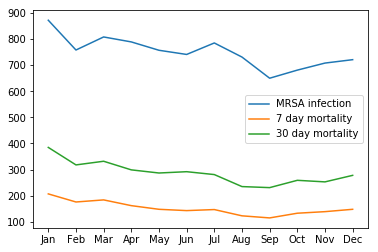

In [12]:
# line plot to visualize relationship of month to infection and mortality counts. 
ax = monthlymort.plot()
ax.set_xticks(monthlymort.index)
ax.set_xticklabels(monthlymort.Month)

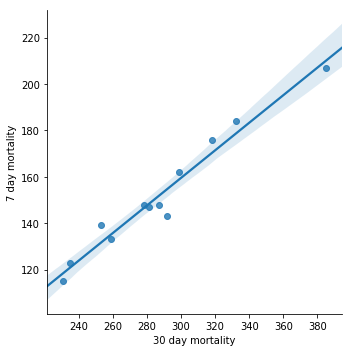

In [14]:
sns.lmplot(y="7 day mortality", x="30 day mortality", data=monthlymort)

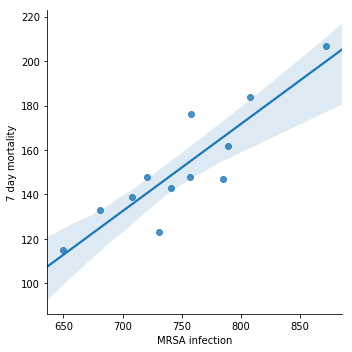

In [15]:
sns.lmplot(x = "MRSA infection", y = "7 day mortality", data = monthlymort)

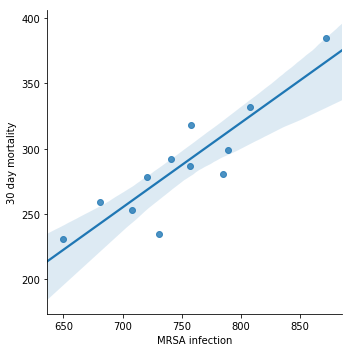

In [16]:
sns.lmplot(x = "MRSA infection", y = "30 day mortality", data = monthlymort)

In [17]:
monthlymort.sum()

Month               JanFebMarAprMayJunJulAugSepOctNovDec
MRSA infection                                      9001
7 day mortality                                     1825
30 day mortality                                    3450
dtype: object

In [18]:
# total monthly infection / days in a year = average daily infection
9001/365

24.660273972602738

In [34]:
ageMort = pd.DataFrame({"Age": ["<15", '15-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>85'], "Infections": (126, 377, 462, 696, 1189, 1900, 2738, 1513), "7 Day Mortality": (2, 12, 42, 94, 193, 360, 697, 425), "30 Day Mortality" : (8, 29, 86, 182, 323, 697, 1266, 859)})
ageMort

,Age,Infections,7 Day Mortality,30 Day Mortality
0,<15,126,2,8
1,15-34,377,12,29
2,35-44,462,42,86
3,45-54,696,94,182
4,55-64,1189,193,323
5,65-74,1900,360,697
6,75-84,2738,697,1266
7,>85,1513,425,859


In [20]:
ageMort.std()

Infections          889.474072
7 Day Mortality     247.184973
30 Day Mortality    460.494687
dtype: float64

[Text(0,0,'<15'),
 Text(0,0,'15-34'),
 Text(0,0,'35-44'),
 Text(0,0,'45-54'),
 Text(0,0,'55-64'),
 Text(0,0,'65-74'),
 Text(0,0,'75-84'),
 Text(0,0,'>85')]

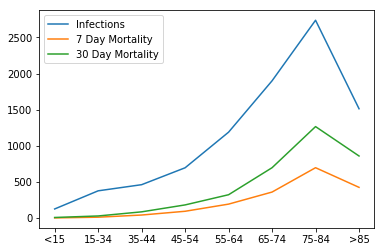

In [36]:
# line plot to visualize relationship of Age to infections and mortality counts. 
ax = ageMort.plot()
ax.set_xticks(ageMort.index)
ax.set_xticklabels(ageMort.Age)

In [21]:
ageMort['infection/year'] =  ageMort['Infections']/365 
ageMort['7dayP'] = ageMort['7 Day Mortality'] / ageMort['Infections']
ageMort['30dayP'] = ageMort['30 Day Mortality'] / ageMort['Infections']

In [22]:
ageMort

,Age Group,Infections,7 Day Mortality,30 Day Mortality,infection/year,7dayP,30dayP
0,<15,126,2,8,0.345205,0.015873,0.063492
1,15-34,377,12,29,1.032877,0.031830,0.076923
2,35-44,462,42,86,1.265753,0.090909,0.186147
3,45-54,696,94,182,1.906849,0.135057,0.261494
4,55-64,1189,193,323,3.257534,0.162321,0.271657
5,65-74,1900,360,697,5.205479,0.189474,0.366842
6,75-84,2738,697,1266,7.501370,0.254565,0.462381
7,>85,1513,425,859,4.145205,0.280899,0.567746


In [23]:
# <15   - 0.35, 0.02, 0.06
# 15-34 - 1.03, 0.03, 0.08
# 35-44 - 1.27, 0.09, 19
# 45-54 - 1.91, 0.14, 0.26
# 55-64 - 3.26, 0.16, .27
# 65-74 - 5.21, 0.18, 0.37
# 75-84 - 7.50, 0.25, 0.46 
# >85   - 4.15, 0.28, 0.57  


In [24]:
# Simulated data for Infections per year and 7 and 30 day mortality

# The <15 category uses the binomial distribution
# For the rest, the normal distribution is used instead
a = pd.DataFrame({'Sim<15': np.random.binomial(1, .35, 365), 'Sim 15-34': np.random.normal(1.03, 0.01, 365), 'Sim 35-44': np.random.normal(1.27, 0.01, 365), 'Sim 45-54': np.random.normal(1.91, 0.01, 365), 'Sim 55-64': np.random.normal(3.26, 0.01, 365), 'Sim 65-74':np.random.normal(5.21, 0.01, 365), 'Sim 75-84': np.random.normal(7.5, 0.01, 365), 'Sim >85': np.random.normal(4.15, 0.01, 365) })


In [25]:
a

,Sim<15,Sim 15-34,Sim 35-44,Sim 45-54,Sim 55-64,Sim 65-74,Sim 75-84,Sim >85
0,0,1.029268,1.283972,1.901474,3.270481,5.202881,7.501442,4.129174
1,0,1.049887,1.282885,1.906784,3.253032,5.221439,7.499765,4.134891
2,0,1.038460,1.281168,1.913517,3.251056,5.203295,7.516110,4.145295
3,0,1.040593,1.273945,1.914295,3.271044,5.227184,7.493132,4.151753
4,0,1.012294,1.269538,1.908401,3.253373,5.206396,7.496036,4.165287
5,0,1.034822,1.277947,1.913932,3.261586,5.203902,7.505293,4.143515
6,0,1.048087,1.257787,1.904206,3.246529,5.223366,7.494197,4.153265
7,1,1.012143,1.277215,1.910349,3.249827,5.207599,7.501793,4.142481
8,0,1.039134,1.261992,1.903409,3.249499,5.223185,7.481920,4.150599
9,0,1.034405,1.257180,1.899010,3.262159,5.221285,7.500410,4.156668


In [26]:
a.sum()

Sim<15        118.000000
Sim 15-34     376.034390
Sim 35-44     463.012727
Sim 45-54     697.172366
Sim 55-64    1189.766317
Sim 65-74    1901.717187
Sim 75-84    2737.316683
Sim >85      1514.564707
dtype: float64

In [27]:
#Fake data
n = np.arange(0, 100, 1)
s = 20 * n + 10 + np.random.normal (0.0, 5.0, n.size)

In [28]:
s

array([  15.97967794,   25.0375659 ,   52.64006169,   74.20985173,
         97.41544238,  113.5576142 ,  133.17703712,  151.16897384,
        171.42949439,  184.19461743,  221.19386741,  220.38136185,
        252.18947664,  263.3415861 ,  295.64407339,  307.19389366,
        336.87907895,  354.47759485,  363.02299776,  379.74457123,
        419.16847084,  432.76300837,  449.10317085,  456.69436119,
        497.7831964 ,  515.11193656,  533.0293568 ,  554.45675793,
        564.51579556,  589.93029587,  610.06553427,  638.84423502,
        659.42798124,  669.33366582,  689.05567364,  721.11664257,
        738.86651962,  757.2612806 ,  778.31911466,  792.57449384,
        815.22452195,  833.08102666,  864.33142375,  869.57181149,
        889.81825857,  908.42061468,  930.70778655,  953.06277598,
        971.32629694,  995.08528465, 1021.65494543, 1026.41050827,
       1048.03201011, 1074.37320328, 1092.44961066, 1107.7905175 ,
       1128.04841211, 1142.77441378, 1173.59465875, 1199.13800

In [29]:
# Fake data for daily infection of males and females
infection = pd.DataFrame({"maleInfection": np.random.binomial(25, .62, 365), "femaleInfection": np.random.binomial(25, .38, 365)})
infection

,maleInfection,femaleInfection
0,12,8
1,17,12
2,10,11
3,16,6
4,17,9
5,19,11
6,17,10
7,16,8
8,16,11
9,14,10


In [30]:
infection.sum()

maleInfection      5588
femaleInfection    3541
dtype: int64

In [31]:
infection.describe()

,maleInfection,femaleInfection
count,365.000000,365.000000
mean,15.309589,9.701370
std,2.309807,2.413589
min,8.000000,3.000000
25%,14.000000,8.000000
50%,16.000000,10.000000
75%,17.000000,11.000000
max,21.000000,17.000000


In [32]:
pd.__version__

'0.23.0'